<a href="https://colab.research.google.com/github/davifebdn/visualitzacio_exploratoria/blob/main/Copy_of_Data_Science_Sprint_2_T05_Exploraci%C3%B3_de_les_dades_(versi%C3%B3_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S02 T05: Exploració de les dades
Familiaritza't amb les tècniques d'exploració de les dades mitjantçant la estructura de dades, Dataframe amb la llibreria Pandas. 

## Nivell 1

### Exercici 1
Descarrega el data set [Airlines Delay: Airline on-time statistics and delay](https://www.kaggle.com/datasets/giovamata/airlinedelaycauses) causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

In [ ]:
#Tot això és el procés per poder fer servir l'arxiu .csv des de Google Colab i el meu Google Drive
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1rynU9E5CuqHG3WtuM9MpD2FXdAFNbRwk/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('DelayedFlights.csv')

df = pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


A través de Kaggle es troba la [font original de les dades](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7), on explica què és cada columna i en quines unitats estan:
0. Unnamed: No està a la base original.
1. Year: 2008 
2. Month: 1-12 
3. DayofMonth: 1-31 
4. DayOfWeek: 1 (Monday) - 7 (Sunday) 
5. DepTime: actual departure time (local, hhm m) 
6. CRSDepTime: scheduled departure time (local, hhmm)
7. ArrTime: actual arrival time (local, hhmm) 
8. CRSArrTime: scheduled arrival time (local, hhmm) 
9. UniqueCarrier: unique carrier code 
10. FlightNum: flight number 
11. TailNum: plane tail number 
12. ActualElapsedTime: in minutes 
13. CRSElapsedTime: in minutes 
14. AirTime: in minutes 
15. ArrDelay: arrival delay, in minutes 
16. DepDelay: departure delay, in minutes 
17. Origin: origin IATA airport code 
18. Dest: destination IATA airport code 
19. Distance: in miles 
20. TaxiIn: taxi in time, in minutes 
21. TaxiOut: taxi out time in minutes 
22. Cancelled: was the flight cancelled? 
23. CancellationCode: reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24. Diverted: 1 = yes, 0 = no 
25. CarrierDelay: in minutes 
26. WeatherDelay: in minutes 
27. NASDelay: in minutes 
28. SecurityDelay: in minutes 
29. LateAircraftDelay: in minutes 





Llavors, pasem a revisar la informació bàsica de la base de dades:

In [ ]:
print("Número de files i columnes:")
df.shape

Número de files i columnes:


(1936758, 30)

In [ ]:
print("Columnes i tipus de data a cadascuna:")
df.info()

Columnes i tipus de data a cadascuna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted    

Els valors de la primera columna `Unnamed: 0` no aprota cap valor i els números no son consecutius, per tant, la esborrem.


Les dades de les columnes 9 i 10 , (`FlightNum` i `TailNum`) tampoc aporten cap informació estadística. Així que les esborrem també.


La columna 8 (`UniqueCarrier`) l'havia esborrat però es necessita per l'exercici 2.

In [ ]:
df2 = df.drop(columns=['Unnamed: 0', 'FlightNum', 'TailNum'])
df2.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,101.0,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Volem juntar les columnes de dia, mes i any, però primer hem de modificar el nom de `DayOfMonth` a `Day`.


In [ ]:
df3 = df2.rename(columns={"DayofMonth": "Day"})
df3.head()

,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,128.0,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,128.0,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,96.0,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,90.0,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,101.0,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Llavors, fem el canvi i llavors podem eliminar les columnes amb aquestes dades.

In [ ]:
df3['Date'] = pd.to_datetime(df3[["Year", "Month", "Day"]])
df4 = df3.drop(columns=['Year', 'Month', 'Day'])

df4.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03
4,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,11.0,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03


A continuació, s'adjunten unes imatges resum de la taula:
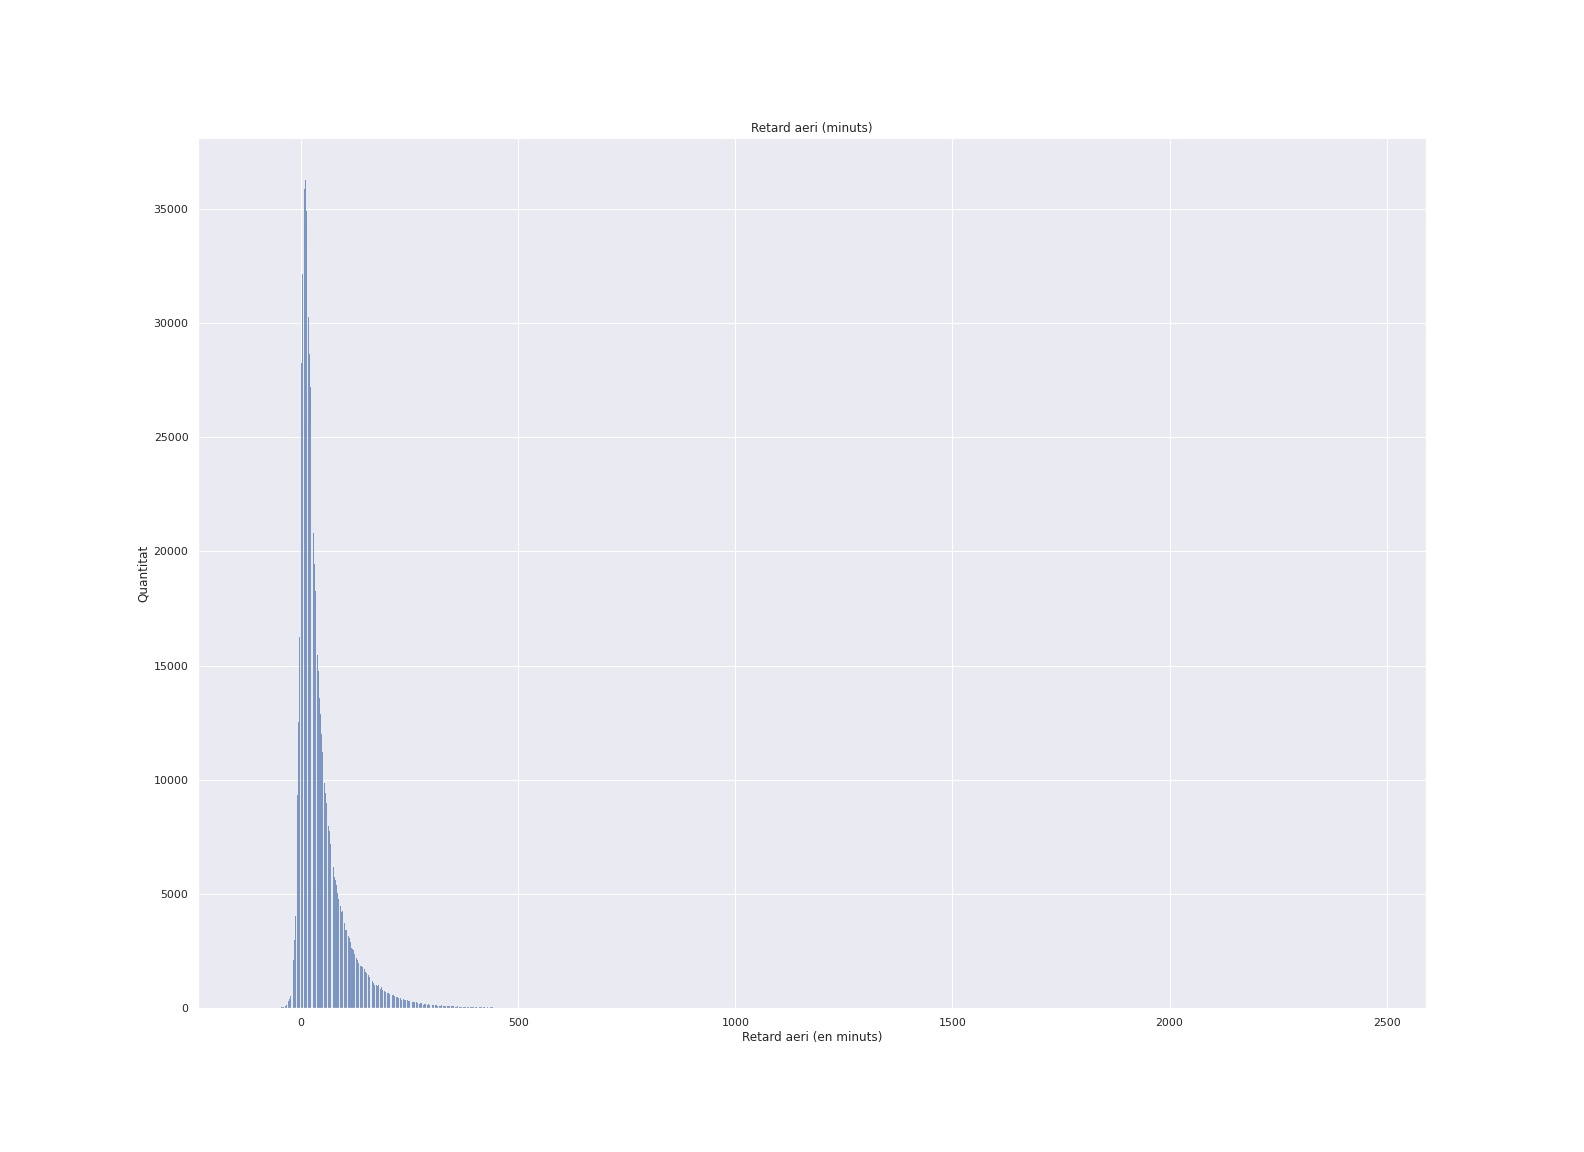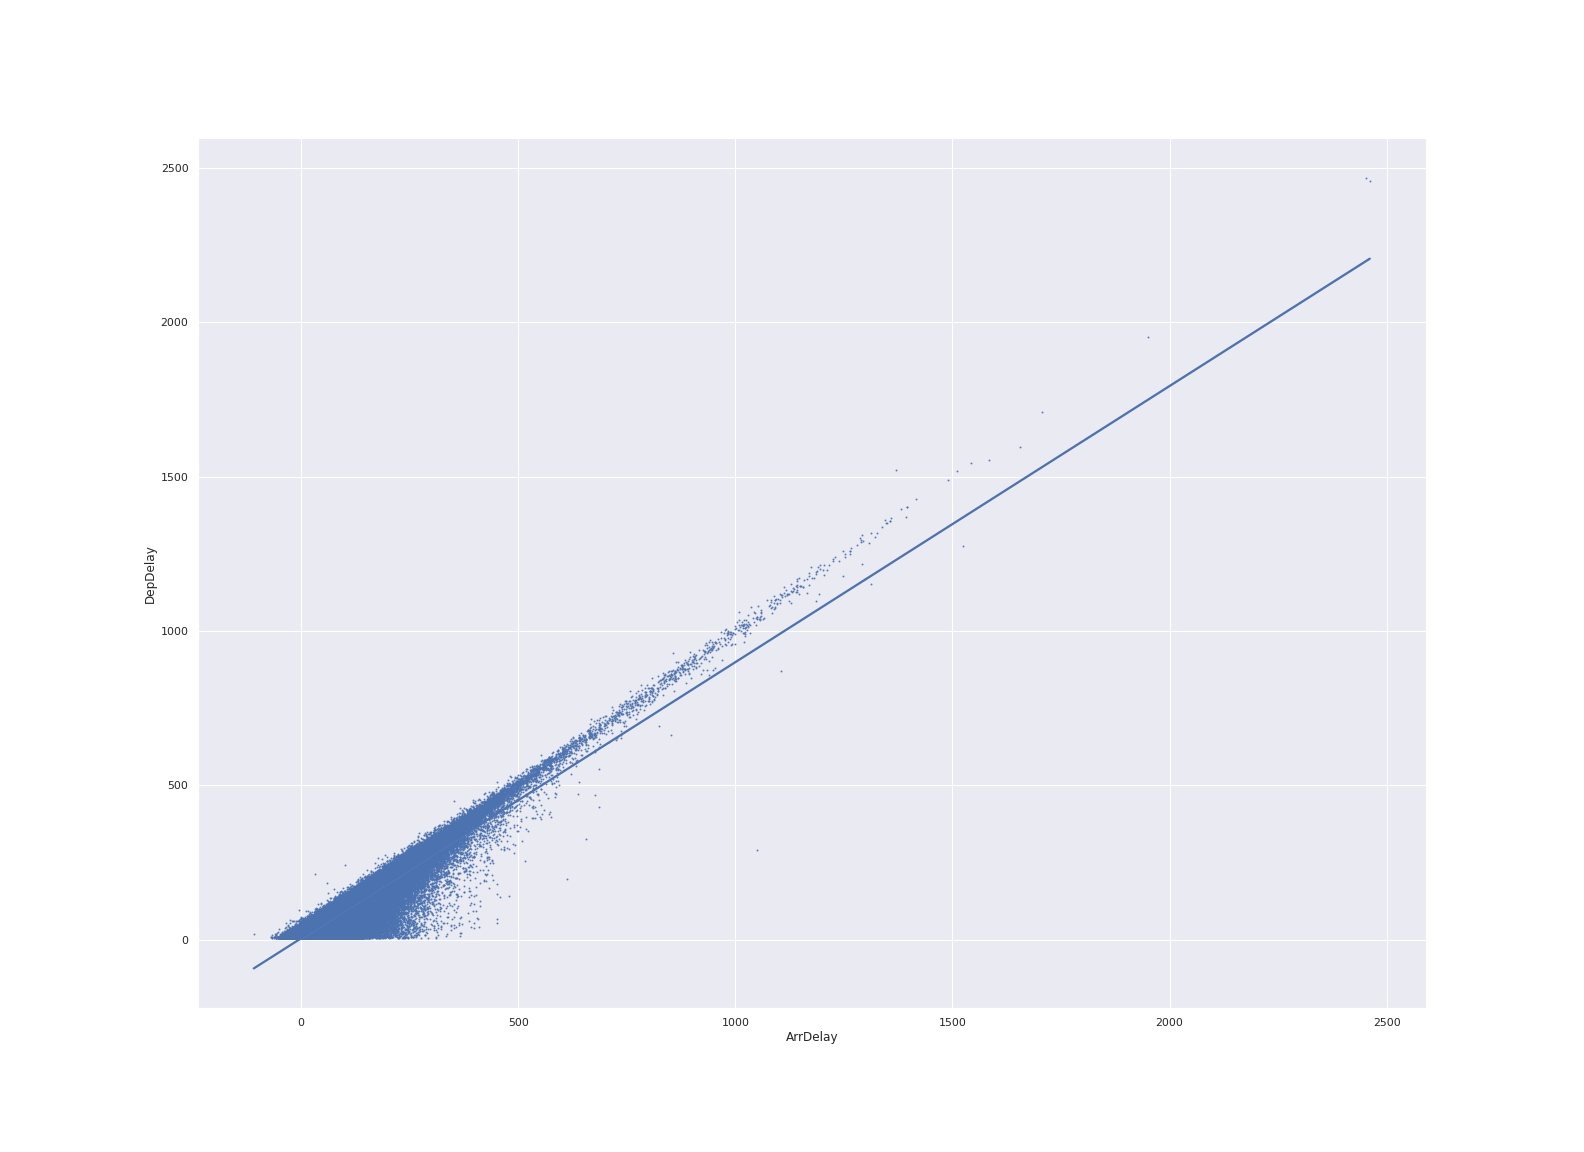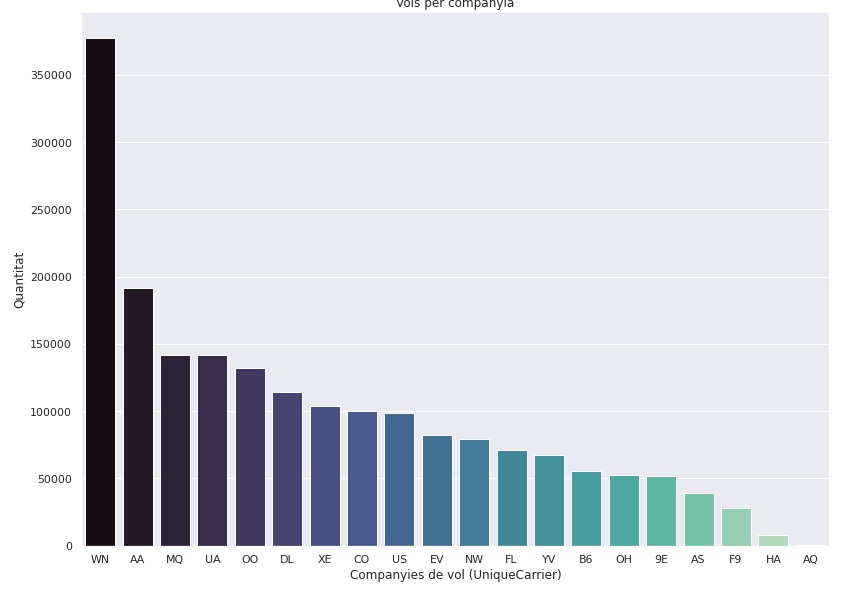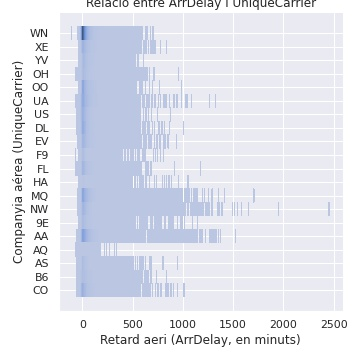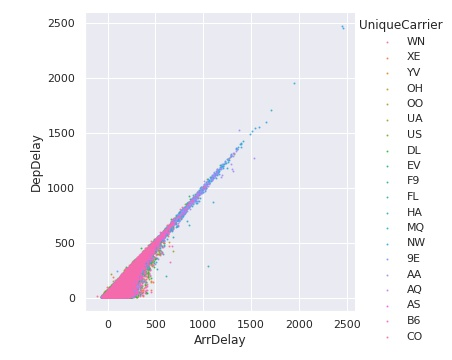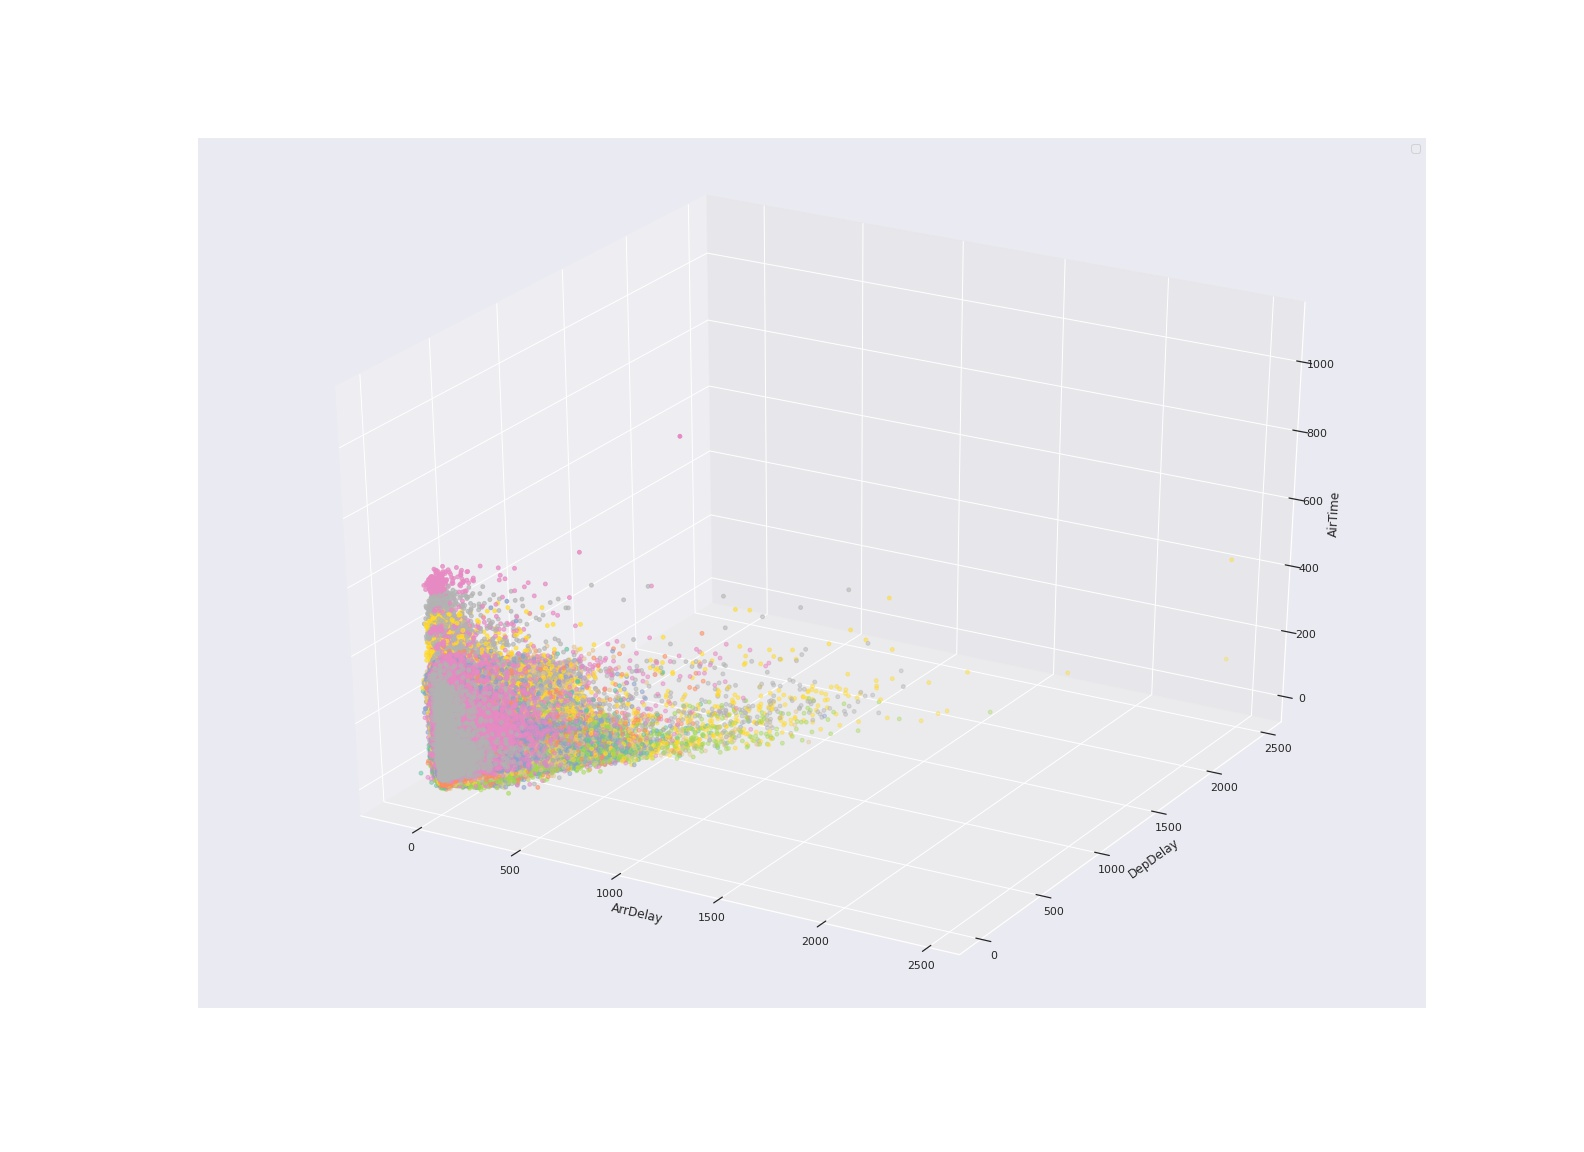

### Exercici 2

Fes un informe complet del data set:

 *   Resumeix estadísticament les columnes d’interès
 *   Troba quantes dades faltants hi ha per columna
 *   Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)
 *   Taula de les aerolínies amb més endarreriments acumulats
 *   Quins són els vols més llargs? I els més endarrerits?
 *   Etc.

In [ ]:
#Resum estadístic
df4.describe()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [ ]:
#Dades faltants per columna
df4.isnull().sum(axis = 0)

DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
Date                      0
dtype: int64

In [ ]:
#Velocitat mitjana de vol (transformat a km/h)
df4['MeanVelocity'] = ((df4['Distance']*1.6093) / ((df4['ArrTime'] - df4['DepTime'])/60))
df4.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,MeanVelocity
0,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,376.019135
1,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,315.370887
2,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,282.541875
3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,...,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,382.518231
4,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,11.0,...,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,367.027094


In [ ]:
#Si el vol ha arribat tard
df4['Late'] = (df4['ArrTime'] > df4['CRSArrTime'])
df4.head()

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,MeanVelocity,Late
0,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,-14.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,376.019135,False
1,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,2.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,315.370887,True
2,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,14.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,282.541875,True
3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,34.0,...,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,382.518231,True
4,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,11.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,367.027094,True


In [ ]:
#Areolínies amb més endarreriments
aerolinies = df4.groupby('UniqueCarrier')
aerolinies['ArrDelay'].agg(np.sum)

UniqueCarrier
9E     2420468.0
AA     8889066.0
AQ       15814.0
AS     1406735.0
B6     3025749.0
CO     4045932.0
DL     4535644.0
EV     3888131.0
F9      788549.0
FL     3100150.0
HA      255613.0
MQ     6396704.0
NW     3462075.0
OH     2675993.0
OO     5978936.0
UA     6733013.0
US     3571867.0
WN    11319092.0
XE     5176042.0
YV     3691461.0
Name: ArrDelay, dtype: float64

In [ ]:
#Els vols més llargs
distancia = df4.drop_duplicates('Distance')
distancies = distancia.sort_values('Distance', ascending=False)
distancies[['Origin', 'Dest', 'Distance']].head(10)

,Origin,Dest,Distance
173177,EWR,HNL,4962
96292,HNL,ATL,4502
66587,ORD,HNL,4243
66613,KOA,ORD,4213
66624,ORD,OGG,4184
134702,HNL,MSP,3972
172830,IAH,HNL,3904
145183,DFW,HNL,3784
145190,OGG,DFW,3711
808579,ANC,ATL,3417


In [ ]:
#Els vols més curts
distancies[['Origin', 'Dest', 'Distance']].tail(10)

,Origin,Dest,Distance
942589,MHT,BOS,45
619866,MKG,GRR,41
941510,SRQ,TPA,40
1111660,PUB,COS,37
51465,LAX,SNA,36
759223,LGB,ONT,35
164500,PSG,WRG,31
169785,JFK,HPN,30
47146,IAD,DCA,24
774654,JFK,LGA,11


### Exercici 3

Exporta el data set net i amb les noves columnes a Excel.

In [ ]:
#df4.to_csv("AirlinesDelayDavid.csv")

chunksize = 500000
df = pd.read_csv('DelayedFlights.csv')
i=0
for chunk in np.split(df, len(df) // chunksize):
    chunk.to_excel('https://drive.google.com/file/d/1rynU9E5CuqHG3WtuM9MpD2FXdAFNbRwk/view?usp=sharing_{:02d}.xlsx'.format(i), index=False)
    i += 1